<a href="https://colab.research.google.com/github/DanielOrBO/Infrared-Solar-Modules-Classifier/blob/main/01%20-%20exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
!kaggle competitions download -c udea-ai4eng-20241


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame

import pandas as pd

In [12]:
%%bash
chmod 600 ./kaggle.json
export KAGGLE_CONFIG_DIR=.
kaggle competitions download -c udea-ai4eng-20241
unzip udea-ai4eng-20241


udea-ai4eng-20241.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  udea-ai4eng-20241.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


In [13]:
df = pd.read_csv("train.csv")

In [14]:
print("Información general del DataFrame:")
df.info()

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ID                              692500 non-null  int64 
 1   PERIODO                         692500 non-null  int64 
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object
 7   FAMI_TIENEINTERNET              665871 non-null  object
 8   FAMI_EDUCACIONPADRE             669322 non-null  object
 9   FAMI_TIENELAVADORA              652727 non-null  object
 10  FAMI_TIENEAUTOMOVIL             648877 non-null  object
 11  ESTU_PRIVADO_LIBERTAD           692500 non-null  object


In [15]:
print("Primeras filas del DataFrame:")
df.head()

Primeras filas del DataFrame:


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo


In [16]:
print("\nConteo de valores únicos en cada columna:")
styled_df = df.style.set_caption('Mi DataFrame')
for column in df.columns:
    print(df[column].value_counts())
    print()


Conteo de valores únicos en cada columna:
904256    1
915348    1
373660    1
691058    1
790510    1
         ..
190471    1
882806    1
297614    1
540154    1
933374    1
Name: ID, Length: 692500, dtype: int64

20195    180873
20203    171838
20212    171412
20183    164818
20194      1472
20213      1178
20202       490
20184       254
20196       165
Name: PERIODO, dtype: int64

DERECHO                                                   53244
ADMINISTRACION DE EMPRESAS                                51902
CONTADURIA PUBLICA                                        39664
PSICOLOGIA                                                31932
INGENIERIA INDUSTRIAL                                     28481
                                                          ...  
LICENCIATURA EN ESPAÑOL Y FILOLOGÍA                           1
ADMINISTRACION EN NEGOCIOS INTERNACIONALES                    1
ADMINISTRACION DE COMERCIO EXTERIOR                           1
LICENCIATURA EN EDUCACI¿N F¿SICA REC

In [17]:
print("Valores nulos en el DataFrame:") #Buscamos la cantidad de datos nulos, para hacer un panorama de los datos faltantes en cada columna.
df.isnull().sum()

Valores nulos en el DataFrame:


ID                                    0
PERIODO                               0
ESTU_PRGM_ACADEMICO                   0
ESTU_PRGM_DEPARTAMENTO                0
ESTU_VALORMATRICULAUNIVERSIDAD     6287
ESTU_HORASSEMANATRABAJA           30857
FAMI_ESTRATOVIVIENDA              32137
FAMI_TIENEINTERNET                26629
FAMI_EDUCACIONPADRE               23178
FAMI_TIENELAVADORA                39773
FAMI_TIENEAUTOMOVIL               43623
ESTU_PRIVADO_LIBERTAD                 0
ESTU_PAGOMATRICULAPROPIO           6498
FAMI_TIENECOMPUTADOR              38103
FAMI_TIENEINTERNET.1              26629
FAMI_EDUCACIONMADRE               23664
RENDIMIENTO_GLOBAL                    0
dtype: int64

<Axes: >

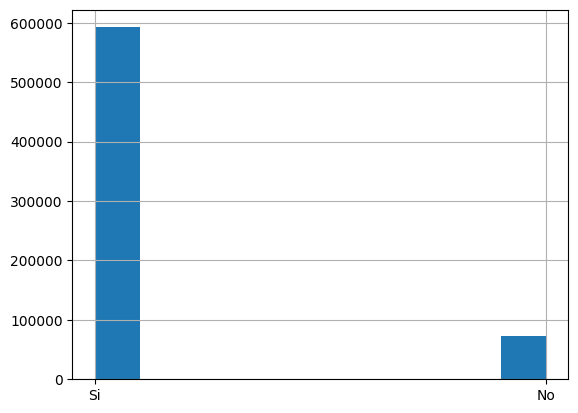

In [18]:
df.FAMI_TIENEINTERNET.hist()


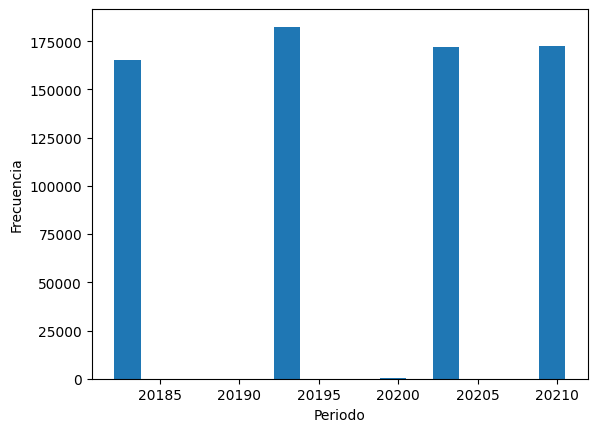

In [19]:
# df.PERIODO.hist(bins=9, rwidth=0.5)
plt.hist(df["PERIODO"],bins=9, align='left', rwidth=0.5)
plt.xlabel("Periodo")
plt.ylabel("Frecuencia")
plt.show()

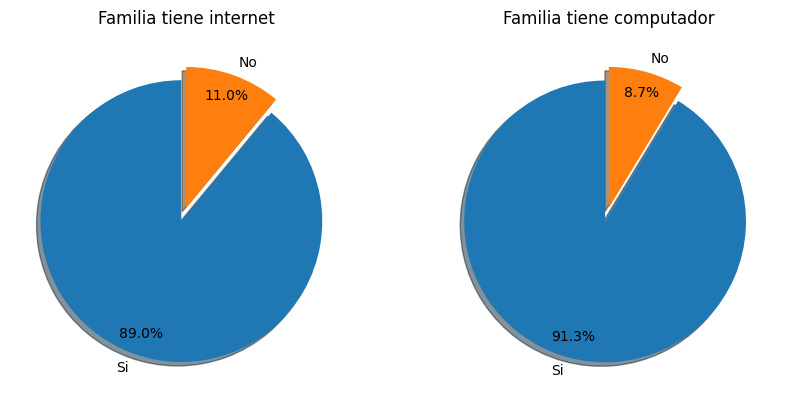

In [26]:
# Crear una figura con dos subplots en una fila
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Crear el gráfico de pie para la columna "Month"
month_counts = df['FAMI_TIENEINTERNET'].value_counts()
explode1 = [0.1 if i == month_counts.idxmax() else 0 for i in month_counts.index]  # Mover la rebanada más grande hacia afuera
ax1.pie(month_counts, labels=month_counts.index, autopct='%1.1f%%', startangle=90, explode=explode1,
        shadow=True, pctdistance=0.85)  # Establecer sombreado y distancia de porcentaje
ax1.set_title("Familia tiene internet")

# Crear el gráfico de pie para la columna "Day_of_Week"
day_of_week_counts = df['FAMI_TIENECOMPUTADOR'].value_counts()
explode2 = [0.1 if i == day_of_week_counts.idxmax() else 0 for i in day_of_week_counts.index]  # Mover la rebanada más grande hacia afuera
ax2.pie(day_of_week_counts, labels=day_of_week_counts.index, autopct='%1.1f%%', startangle=90,
        shadow=True, pctdistance=0.85, explode=explode2)  # Establecer sombreado, distancia de porcentaje y rebanada afuera
ax2.set_title("Familia tiene computador")

# Mostrar los sub

plt.show()